In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'May 2017'

<h2>Основная таблица</h2>

In [6]:
rep_2016_17 = report['2016':] # данные с 2016 по н.в.
rep_2016_17

channels                             goals                       
             yandex google go.mail.ru  bry  cpc order basket contact measure
2016-01-31     4471   1253        537  123  316     6    160     367      16
2016-02-29     5630   1683        597   88  543    19    264     533      10
2016-03-31     5946   1641        530  101  514    22    217     571      20
2016-04-30     5887   1470        479   69  228    24    196     484      12
2016-05-31     5846   1183        361   87    0    21    243     485      27
2016-06-30     5913   1134        351   76    0    12    257     478      17
2016-07-31     5166   1108        364   58    0    15    213     396      20
2016-08-31     4689   1120        348   59    0    30    308     349      18
2016-09-30     4244   1071        302   53    0     6    238     321      15
2016-10-31     4153   1711        329   38    0     6    210     357      28
2016-11-30     3853   2491        304   46    0    14    224     436      21
2016-12-31     2781   2551        291  606    0    16    139     358      15
2017-01-31     2949   3084        375  511    0     4    243     355       8
2017-02-28     2701   2414        282  486    0     8    197     311      14
2017-03-31     2590   2283        284  426    0    11    157     298      11
2017-04-30     1890   2390        243  395    0    10    123     260      31
2017-05-31     2006   2584        110  389    0     4    106     221      29

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [7]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2017-05-31      116    194       -133  -6   0    -6    -17     -39      -2

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

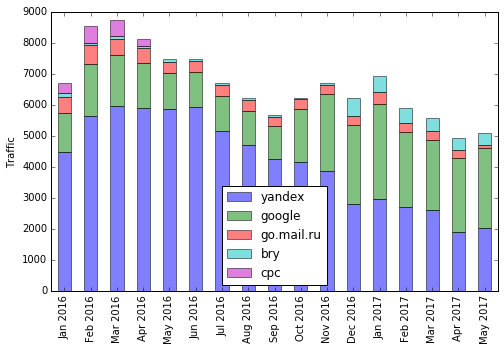

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2016_17.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2016_17.index]);

<h3>Линейная диаграмма изменений трафика</h3>

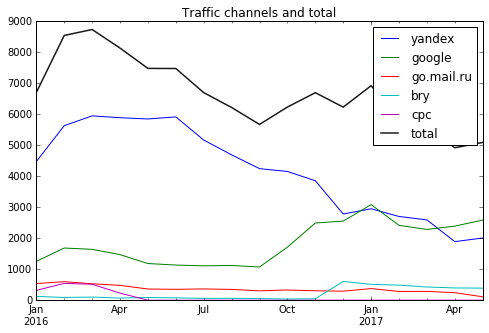

In [9]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2016_17.channels.plot(ax=ax);
rep_2016_17.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [10]:
kw = 'keyword visit'.split()

In [11]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
bing   0                                    двери белорусские     25
       1                                   двери с фурнитурой     19
       2                       двери с доставкой и установкой     17
       3                                       двери под ключ     16
       4                                    двери беленый дуб     13
       5                                       двери недорого     13
       6                                   двери межкомнатные     12
       7                               входные двери недорого     11
       8                                       двери волховец     11
       9                                  двери эмалированные     11
       10                                    двери со скидкой     10
       11                                          двери купе      9
       12                             интернет магазин дверей      8
       13                                   арки межкомнатные      7
       14                                   двери с капителью      7
       15                           двери ульяновские каталог      7
       16                         магазин межкомнатных дверей      7
       17                        межкомнатные двери с замками      7
       18                                  входные двери цена      6
       19                                         двери эмаль      6
       20                       ламинированные двери недорого      6
       21                                  межкомнатные двери      6
       22                            входные деревянные двери      5
       23                                      двери в ванную      5
       24                                         двери верда      5
       25                                        двери книжка      5
       26                                    двери со стеклом      5
       27                                 двери шпонированные      5
       28                            купить ульяновские двери      5
       29                          межкомнатные двери экошпон      5
...                                                       ...    ...
yandex 882                              дверное полотно 30 мм      1
       883                           дверное полотно 700х2000      1
       884                           дверное полотно 800 1800      1
       885                    дверное полотно глухое на заказ      1
       886                   дверное полотно из хвойных пород      1
       887                дверное полотно ширина 85 см купить      1
       888                         дверные запорные механизмы      1
       889                       дверные полотна межкомнатные      1
       890                    дверные полотна санузел размеры      1
       891                            дверь гармошка на кухню      1
       892                  дверь полотно профильное 800х2000      1
       893              купить дверное полотно хвоя 80 на 200      1
       894                      куплю дешевые дверные полотна      1
       895                                     кухонная дверь      1
       896                 полотно дверное остекленное napoly      1
       897                  полотно на дверь дермантином цена      1
       898                            розсувные двери полотно      1
       899               фасадные двери с бамбуковым полотном      1
       900       характеристика двери мфд однопольное полотно      1
       901                                    дверное полотно      1
       902                          дверное полотно 1200х2000      1
       903                           дверное полотно 1995х795      1
       904                              дверное полотно 75 см      1
       905  деревянные шторы на дверной проем купить в инт...      1
       906        дизайн входа из коридора на кухню без двери      1
       907  купить дверные полотна деревянные панели 400х2000      1
       908             купить дверные полотна массив

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [12]:
data[kw].xs(0, level=1)

,keyword,visit
bing,двери белорусские,25
go.mail.ru,(not set),56
google,np - /,154
rambler,межкомнатная дверь с устаановкой,2
yahoo,np - /,2
yandex,межкомнатные двери недорого с установкой под ключ,765


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [13]:
data_grupped = data.groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.ix[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0                                  двери белорусские     25
           1                                 двери с фурнитурой     19
           2                     двери с доставкой и установкой     17
           3                                     двери под ключ     16
           4                                  двери беленый дуб     13
go.mail.ru 0                                          (not set)     56
           1                        межкомнатные двери недорого     11
           2            межкомнатные двери эконом класса москва      8
           3                                 двери межкомнатные      3
           4                    купить строительные двери в спб      2
google     0                                             np - /    154
           1                                   np - /?pid=pokaz     98
           2                             дверные полотна купить     58
           3                                      двери полотно     25
           4                            np - /?pid=menu-katalog     21
rambler    0                   межкомнатная дверь с устаановкой      2
           1                        межкомнатные двери под ключ      2
           2                    межкомнатные двери с установкой      1
           3  ульяновские межкомнатные двери с установкой в ...      1
yahoo      0                                             np - /      2
           1                              took интернет магазин      1
           2                        межкомнатные двери недорого      1
           3                      не дорогие межкомнатные двери      1
yandex     0  межкомнатные двери недорого с установкой под ключ    765
           1           межкомнатные двери недорого с установкой     28
           2                                      тук тук двери     17
           3                    межкомнатные двери с установкой     16
           4                     тук тук двери официальный сайт     15